# Notebook to perform EDA for the data provided for the spaceship titanic challenge on Kaggle 
### https://www.kaggle.com/competitions/spaceship-titanic/data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Part 1: Clean up the data

First make sure there are no duplicate passenger entries based on PassengerID and Name



In [3]:
print(df['PassengerId'].nunique(), df['Name'].nunique())

8693 8473


In [4]:
df['Duplicate_name_idx'] = df.duplicated(subset=['Name'])
duplicate_name_idx = df.index[df['Duplicate_name_idx'] == True].tolist()
len(duplicate_name_idx)

219

In [5]:
df = df.drop(index = duplicate_name_idx)

In [6]:
print(df['PassengerId'].nunique(), df['Name'].nunique(), df['Cabin'].nunique())

8474 8473 6424


Deal with missing values in services by setting them to 0

In [7]:
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

Drop rows that involve empty entries in at least one column

In [8]:
all_null_idx = []

for column in df:
    null_idx_in_column = df[df[column].isnull()].index.tolist()
    for null_idx in null_idx_in_column:
        if null_idx not in all_null_idx:
            all_null_idx.append(null_idx)
   
len(all_null_idx)

1095

In [9]:
df = df.drop(index = all_null_idx)
df 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Duplicate_name_idx
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False


Then delete columns with Name and Passenger ID as they don't convey any statistically relevant information

In [10]:
df = df.drop(columns = ['PassengerId', 'Name'])
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Duplicate_name_idx'],
      dtype='object')

Split Cabin information in three columns corresponding to dec/num/side respectively

In [11]:
df['Dec'] = df['Cabin'].apply(lambda x: x.split('/')[0])
# actually removed cabin num cause i don't think it conveys that much info 
#df['cabin_num'] = df['Cabin'].apply(lambda x: x.split('/')[1])
df['Side'] = df['Cabin'].apply(lambda x: x.split('/')[2])
# Convert Bool data to bool datatype
df = df.astype({"CryoSleep": bool, "VIP": bool})

# Instead of following the Cabin ids create column with num of passengers in cabin for each missing passenger 
# to take into account the crowdness. this should be highly correlated to VIP status and expenses

df['CabinCrowdness'] = df['Cabin'].map(df['Cabin'].value_counts())

# drop unnesassary columns for training
df = df.drop(columns = ['Cabin', 'Duplicate_name_idx'])
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Dec,Side,CabinCrowdness
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,2
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,1
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,1
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,2


Make sure no null values are included in the dataset now 

In [12]:
for column in df:
    null_idx_in_column = df[df[column].isnull()].index.tolist()
    print(f'There are {len(null_idx_in_column)} empty entries in column {column}' )

There are 0 empty entries in column HomePlanet
There are 0 empty entries in column CryoSleep
There are 0 empty entries in column Destination
There are 0 empty entries in column Age
There are 0 empty entries in column VIP
There are 0 empty entries in column RoomService
There are 0 empty entries in column FoodCourt
There are 0 empty entries in column ShoppingMall
There are 0 empty entries in column Spa
There are 0 empty entries in column VRDeck
There are 0 empty entries in column Transported
There are 0 empty entries in column Dec
There are 0 empty entries in column Side
There are 0 empty entries in column CabinCrowdness


In [13]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinCrowdness
count,7379.000000,7379.000000,7379.000000,7379.000000,7379.000000,7379.000000,7379.000000
mean,28.851064,218.427971,455.014501,174.600759,300.271446,298.606722,1.674346
std,14.477328,637.038616,1628.625110,566.873832,1112.267637,1120.880946,1.197407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,42.000000,66.000000,25.500000,54.000000,42.000000,2.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000,8.000000


In [14]:
df.dtypes

HomePlanet         object
CryoSleep            bool
Destination        object
Age               float64
VIP                  bool
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
Transported          bool
Dec                object
Side               object
CabinCrowdness      int64
dtype: object

### Part 2 perform actual EDA to understand the data 

Create histograms for numerical values 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>,
        <Axes: title={'center': 'FoodCourt'}>],
       [<Axes: title={'center': 'ShoppingMall'}>,
        <Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>],
       [<Axes: title={'center': 'CabinCrowdness'}>, <Axes: >, <Axes: >]],
      dtype=object)

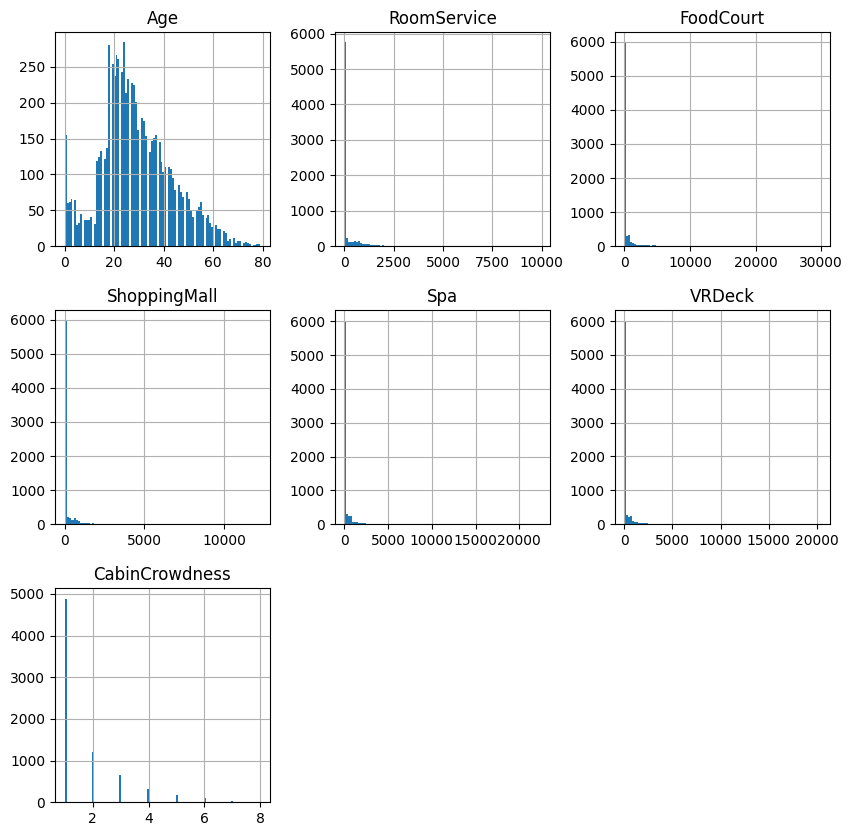

In [15]:
df.hist(bins = 100, figsize = (10,10))

Now let's explore the categorical data HomePlanet, Destination, dec, cabin_num, side

<Axes: xlabel='HomePlanet'>

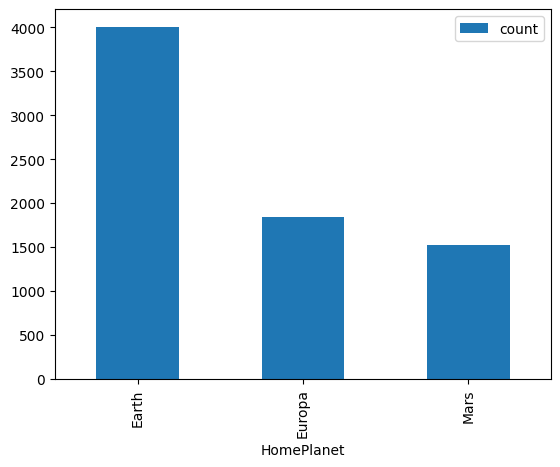

In [16]:
pd.DataFrame(df['HomePlanet'].value_counts()).plot(kind = 'bar')

<Axes: xlabel='Destination'>

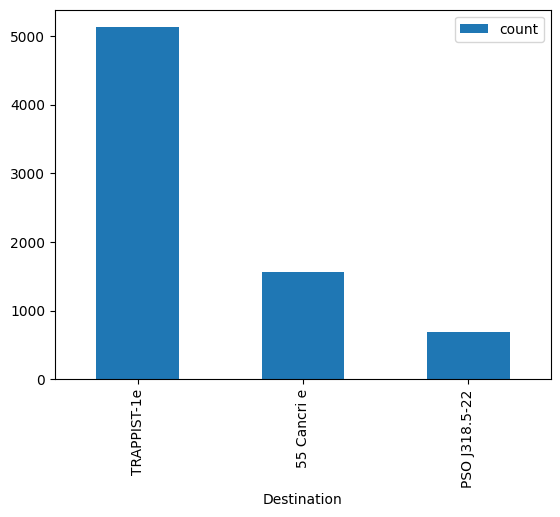

In [17]:
pd.DataFrame(df['Destination'].value_counts()).plot(kind = 'bar')

<Axes: xlabel='Dec'>

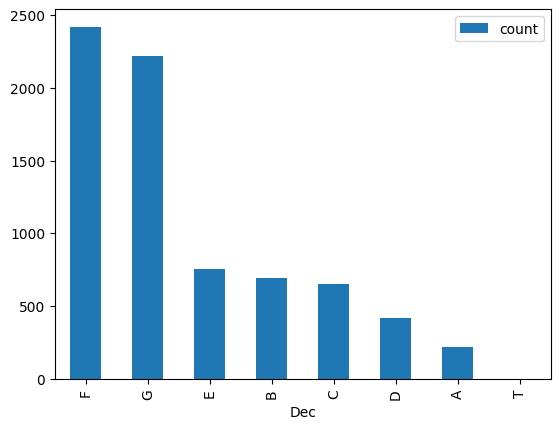

In [18]:
pd.DataFrame(df['Dec'].value_counts()).plot(kind = 'bar')

<Axes: xlabel='Side'>

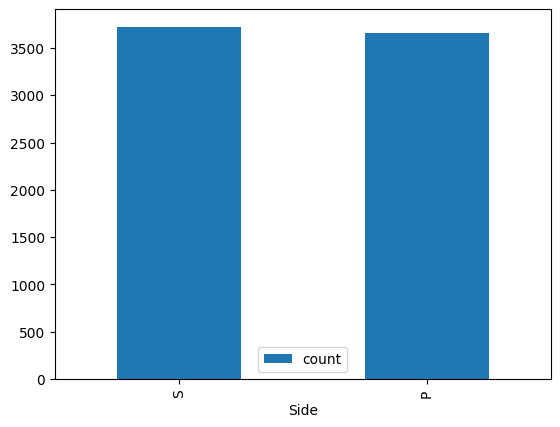

In [19]:
pd.DataFrame(df['Side'].value_counts()).plot(kind = 'bar')

Last but not least let's check the boolean data

In [20]:
bool_values = df[['CryoSleep', 'VIP', 'Transported']]
bool_values.apply(pd.Series.value_counts)

,CryoSleep,VIP,Transported
False,4753,7200,3663
True,2626,179,3716


We note that we have a balanced representation of the two classes (Transported/ Not Transported), so that's good

### Part 3: examine feature correlation and maybe remove some features

<Axes: >

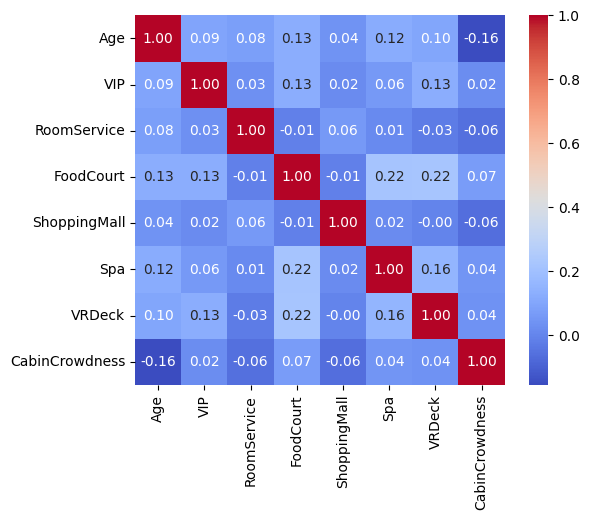

In [21]:
# Select the numerical columns for the heatmap
heatmap_data = df[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinCrowdness']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

Looks pretty good, no features are super correlated. We're keeping them all for now

### Part 4: Prepare data for training 

In [22]:
#TODO: potentially add normalization

In [23]:
# Map bool values to 0, 1
df[['CryoSleep', 'VIP', 'Transported']] = df[['CryoSleep', 'VIP', 'Transported']].astype(int)

In [24]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Dec,Side,CabinCrowdness
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P,1
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S,2
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S,2
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,P,1
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,S,1
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,S,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,S,2


In [29]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['HomePlanet',  'Destination', 'Side','Dec']

for col in categorical_cols:
    print(col)
    le = LabelEncoder()
    le.fit(df[col].astype(str))
    df[col] = le.transform(df[col].astype(str))

HomePlanet
Destination
Side
Dec


In [30]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Dec,Side,CabinCrowdness
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,2
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,2
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,1
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,1,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,1,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,1,2


In [31]:
#save cleaned dataset
df.to_csv('cleaned_train.csv')
